In [22]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from collections import Counter

In [16]:
chemin_fichier = r"C:\Users\hp\Desktop\PFE UM6P\Data\Paramètres Diagnostique_Globale2.xlsx"
nom_feuille = "CapteursTT"
df = pd.read_excel(chemin_fichier, sheet_name=nom_feuille)

In [17]:
df.head()

,C - 529,C - 528,C - 543,C - 545,C - 533,C - 536,C - 542,C - G538- D540,C - 525 - 544,C - 522 - 541
0,2025-01-20 10:32:04,2025-01-16 23:22:02,2025-01-20 10:32:04,2025-01-20 10:32:04,2025-01-16 10:48:58,2025-01-20 10:32:04,2025-01-20 10:32:04,2025-01-20 10:32:04,2025-01-20 10:32:04,2025-01-20 10:32:04
1,2025-01-21 10:32:04,2025-01-16 18:09:19,2025-01-20 10:30:04,2025-01-20 10:30:04,2025-01-16 10:46:57,2025-01-20 10:30:04,2025-01-20 10:30:04,2025-01-20 10:32:04,2025-01-20 10:32:04,2025-01-20 10:32:04
2,2025-01-22 10:32:04,2025-01-16 12:13:36,2025-01-20 10:28:03,2025-01-20 10:28:03,2025-01-16 10:44:58,2025-01-20 10:28:03,2025-01-20 10:28:03,2025-01-20 10:30:04,2025-01-20 10:30:04,2025-01-20 10:30:04
3,2025-01-23 10:32:04,2025-01-11 18:10:26,2025-01-20 10:26:03,2025-01-20 10:26:03,2025-01-16 10:42:58,2025-01-20 10:26:03,2025-01-20 10:26:03,2025-01-20 10:30:04,2025-01-20 10:30:04,2025-01-20 10:30:04
4,2025-01-24 10:32:04,2025-01-09 05:43:13,2025-01-20 10:24:03,2025-01-20 10:24:03,2025-01-16 10:40:57,2025-01-20 10:24:03,2025-01-20 10:24:03,2025-01-20 10:28:03,2025-01-20 10:28:03,2025-01-20 10:28:03


🔎 Aperçu des données après conversion :
              C - 529             C - 528             C - 543  \
0 2025-01-20 10:32:04 2025-01-16 23:22:02 2025-01-20 10:32:04   
1 2025-01-21 10:32:04 2025-01-16 18:09:19 2025-01-20 10:30:04   
2 2025-01-22 10:32:04 2025-01-16 12:13:36 2025-01-20 10:28:03   
3 2025-01-23 10:32:04 2025-01-11 18:10:26 2025-01-20 10:26:03   
4 2025-01-24 10:32:04 2025-01-09 05:43:13 2025-01-20 10:24:03   

              C - 545             C - 533             C - 536  \
0 2025-01-20 10:32:04 2025-01-16 10:48:58 2025-01-20 10:32:04   
1 2025-01-20 10:30:04 2025-01-16 10:46:57 2025-01-20 10:30:04   
2 2025-01-20 10:28:03 2025-01-16 10:44:58 2025-01-20 10:28:03   
3 2025-01-20 10:26:03 2025-01-16 10:42:58 2025-01-20 10:26:03   
4 2025-01-20 10:24:03 2025-01-16 10:40:57 2025-01-20 10:24:03   

              C - 542      C - G538- D540     C - 525 - 544    \
0 2025-01-20 10:32:04 2025-01-20 10:32:04 2025-01-20 10:32:04   
1 2025-01-20 10:30:04 2025-01-20 10:32:04 2025-0

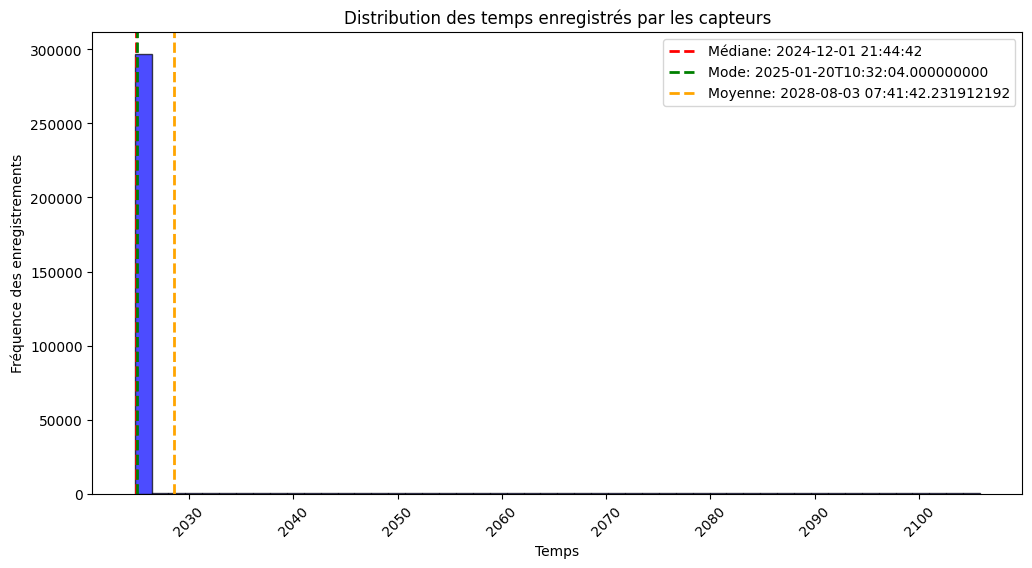

In [21]:
# 🕒 Convertir toutes les colonnes en format datetime en gérant les erreurs
for col in df.columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# 🔍 Vérifier si la conversion a réussi
print("🔎 Aperçu des données après conversion :")
print(df.head())

# 📉 Supprimer les lignes contenant uniquement des valeurs NaN
df.dropna(how='all', inplace=True)

# 🔹 Extraire toutes les valeurs de temps des capteurs dans une liste unique
all_times = df.values.flatten()
all_times = [t for t in all_times if pd.notna(t)]  # Supprimer les valeurs NaN

# 🚨 Vérifier si la liste `all_times` est vide
if not all_times:
    print("⚠️ Aucune donnée valide trouvée dans les colonnes ! Vérifie ton fichier Excel.")
else:
    # 📊 Calcul des statistiques temporelles (conversion en int64 pour éviter l'erreur timestamp)
    median_time = pd.to_datetime(np.median(pd.Series(all_times).astype('int64')), unit='ns')
    mode_time = Counter(all_times).most_common(1)[0][0] if all_times else None
    mean_time = pd.to_datetime(np.mean(pd.Series(all_times).astype('int64')), unit='ns')

    # 🏆 Définir le temps optimal (ici, la médiane est privilégiée)
    optimal_time = median_time

    # 📊 Affichage des résultats
    print(f"\n📈 **Analyse des temps enregistrés**")
    print(f"🔹 Temps médian optimal : {median_time}")
    print(f"🔹 Temps le plus fréquent (Mode) : {mode_time}")
    print(f"🔹 Temps moyen : {mean_time}")
    print(f"✅ Temps sélectionné pour l'analyse : {optimal_time}")

    # 📈 Visualisation de la distribution des temps
    plt.figure(figsize=(12, 6))
    plt.hist(all_times, bins=50, color='blue', alpha=0.7, edgecolor='black')
    plt.axvline(median_time, color='red', linestyle='dashed', linewidth=2, label=f"Médiane: {median_time}")
    plt.axvline(mode_time, color='green', linestyle='dashed', linewidth=2, label=f"Mode: {mode_time}")
    plt.axvline(mean_time, color='orange', linestyle='dashed', linewidth=2, label=f"Moyenne: {mean_time}")
    plt.xlabel("Temps")
    plt.ylabel("Fréquence des enregistrements")
    plt.title("Distribution des temps enregistrés par les capteurs")
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()


🔎 Aperçu des données après conversion :
              C - 529             C - 528             C - 543  \
0 2025-01-20 10:32:04 2025-01-16 23:22:02 2025-01-20 10:32:04   
1 2025-01-21 10:32:04 2025-01-16 18:09:19 2025-01-20 10:30:04   
2 2025-01-22 10:32:04 2025-01-16 12:13:36 2025-01-20 10:28:03   
3 2025-01-23 10:32:04 2025-01-11 18:10:26 2025-01-20 10:26:03   
4 2025-01-24 10:32:04 2025-01-09 05:43:13 2025-01-20 10:24:03   

              C - 545             C - 533             C - 536  \
0 2025-01-20 10:32:04 2025-01-16 10:48:58 2025-01-20 10:32:04   
1 2025-01-20 10:30:04 2025-01-16 10:46:57 2025-01-20 10:30:04   
2 2025-01-20 10:28:03 2025-01-16 10:44:58 2025-01-20 10:28:03   
3 2025-01-20 10:26:03 2025-01-16 10:42:58 2025-01-20 10:26:03   
4 2025-01-20 10:24:03 2025-01-16 10:40:57 2025-01-20 10:24:03   

              C - 542      C - G538- D540     C - 525 - 544    \
0 2025-01-20 10:32:04 2025-01-20 10:32:04 2025-01-20 10:32:04   
1 2025-01-20 10:30:04 2025-01-20 10:32:04 2025-0

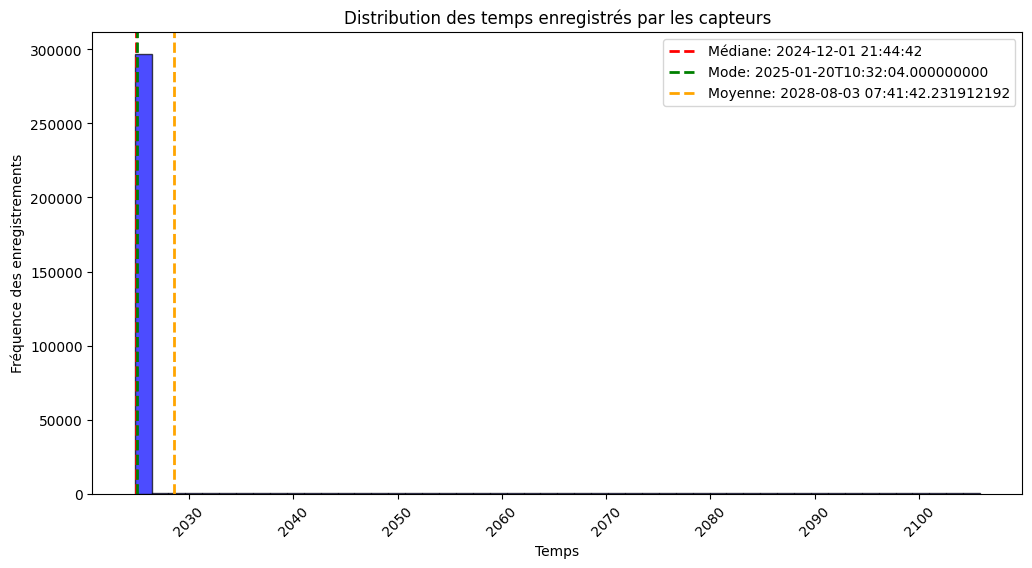

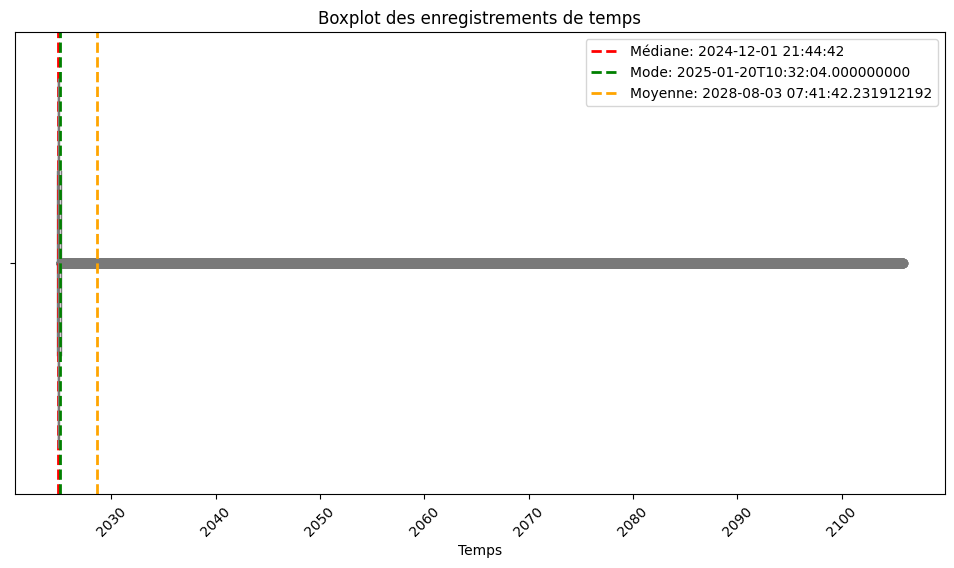

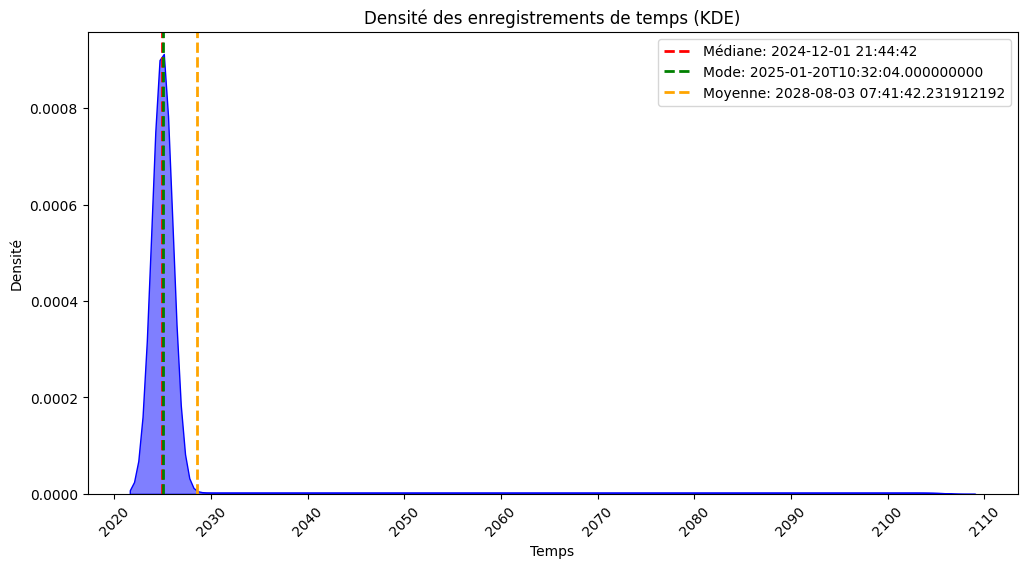

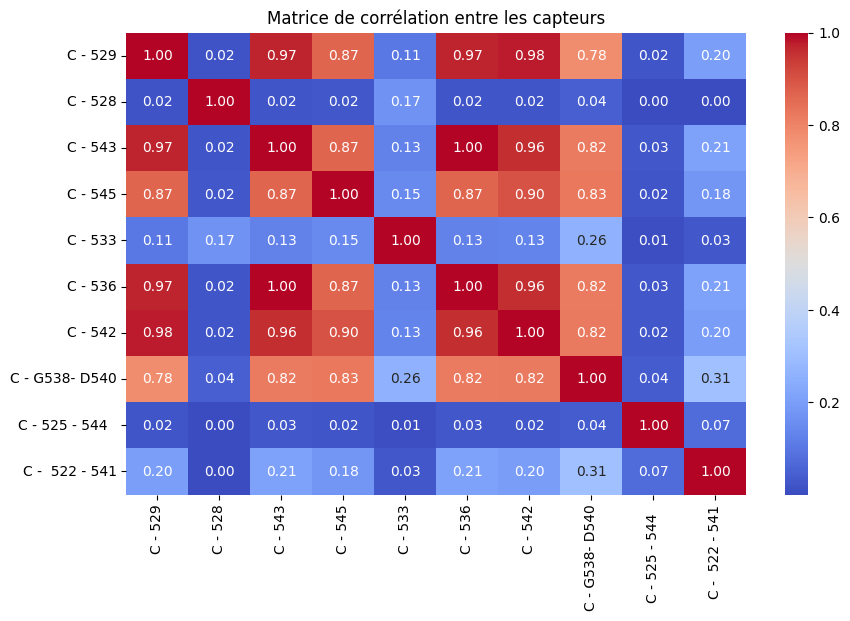

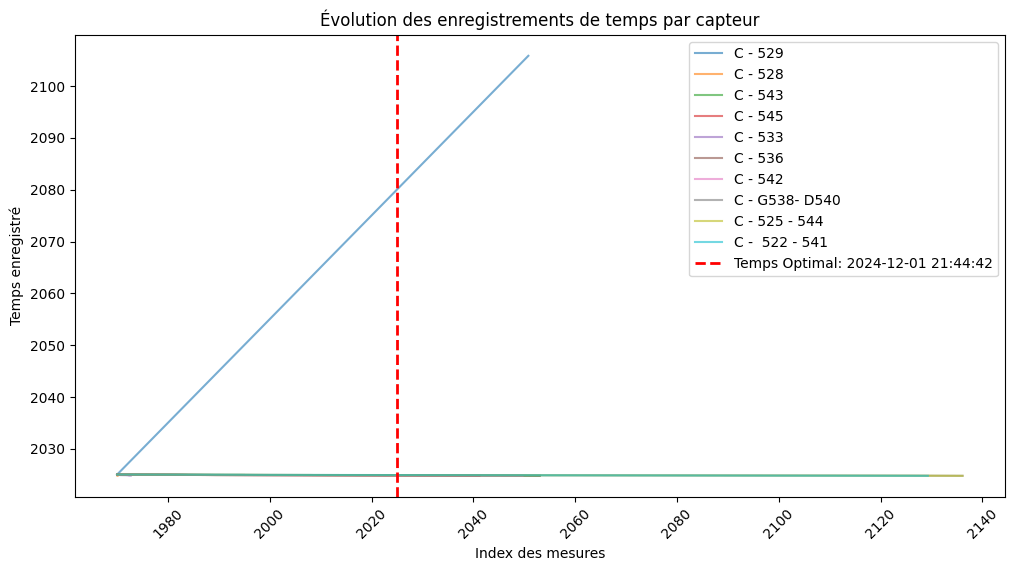

In [23]:
# 🕒 Convertir toutes les colonnes en format datetime en gérant les erreurs
for col in df.columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# 🔍 Vérifier si la conversion a réussi
print("🔎 Aperçu des données après conversion :")
print(df.head())

# 📉 Supprimer les lignes contenant uniquement des valeurs NaN
df.dropna(how='all', inplace=True)

# 🔹 Extraire toutes les valeurs de temps des capteurs dans une liste unique
all_times = df.values.flatten()
all_times = [t for t in all_times if pd.notna(t)]  # Supprimer les valeurs NaN

# 🚨 Vérifier si la liste `all_times` est vide
if not all_times:
    print("⚠️ Aucune donnée valide trouvée dans les colonnes ! Vérifie ton fichier Excel.")
else:
    # 📊 Calcul des statistiques temporelles (correction de l'erreur timestamp)
    median_time = pd.to_datetime(np.median(pd.Series(all_times).astype('int64')), unit='ns')
    mode_time = Counter(all_times).most_common(1)[0][0] if all_times else None
    mean_time = pd.to_datetime(np.mean(pd.Series(all_times).astype('int64')), unit='ns')

    # 🏆 Définir le temps optimal (ici, la médiane est privilégiée)
    optimal_time = median_time

    # 📊 Affichage des résultats
    print(f"\n📈 **Analyse des temps enregistrés**")
    print(f"🔹 Temps médian optimal : {median_time}")
    print(f"🔹 Temps le plus fréquent (Mode) : {mode_time}")
    print(f"🔹 Temps moyen : {mean_time}")
    print(f"✅ Temps sélectionné pour l'analyse : {optimal_time}")

    # 📈 1️⃣ Histogramme de la distribution des temps
    plt.figure(figsize=(12, 6))
    plt.hist(all_times, bins=50, color='blue', alpha=0.7, edgecolor='black')
    plt.axvline(median_time, color='red', linestyle='dashed', linewidth=2, label=f"Médiane: {median_time}")
    plt.axvline(mode_time, color='green', linestyle='dashed', linewidth=2, label=f"Mode: {mode_time}")
    plt.axvline(mean_time, color='orange', linestyle='dashed', linewidth=2, label=f"Moyenne: {mean_time}")
    plt.xlabel("Temps")
    plt.ylabel("Fréquence des enregistrements")
    plt.title("Distribution des temps enregistrés par les capteurs")
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

    # 📈 2️⃣ Boxplot pour voir la dispersion et les valeurs aberrantes
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=all_times, color="lightblue")
    plt.axvline(median_time, color='red', linestyle='dashed', linewidth=2, label=f"Médiane: {median_time}")
    plt.axvline(mode_time, color='green', linestyle='dashed', linewidth=2, label=f"Mode: {mode_time}")
    plt.axvline(mean_time, color='orange', linestyle='dashed', linewidth=2, label=f"Moyenne: {mean_time}")
    plt.xlabel("Temps")
    plt.title("Boxplot des enregistrements de temps")
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

    # 📈 3️⃣ Courbe de densité KDE pour visualiser la répartition
    plt.figure(figsize=(12, 6))
    sns.kdeplot(pd.Series(all_times), fill=True, color="blue", alpha=0.5)
    plt.axvline(median_time, color='red', linestyle='dashed', linewidth=2, label=f"Médiane: {median_time}")
    plt.axvline(mode_time, color='green', linestyle='dashed', linewidth=2, label=f"Mode: {mode_time}")
    plt.axvline(mean_time, color='orange', linestyle='dashed', linewidth=2, label=f"Moyenne: {mean_time}")
    plt.xlabel("Temps")
    plt.ylabel("Densité")
    plt.title("Densité des enregistrements de temps (KDE)")
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

    # 📈 4️⃣ Heatmap des corrélations entre capteurs (si applicable)
    plt.figure(figsize=(10, 6))
    df_numeric = df.apply(lambda x: x.astype('int64') if x.dtype == 'datetime64[ns]' else x)  # Convertir en numérique
    sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Matrice de corrélation entre les capteurs")
    plt.show()

    # 📈 5️⃣ Évolution des enregistrements dans le temps
    plt.figure(figsize=(12, 6))
    for col in df.columns:
        plt.plot(df[col], label=col, alpha=0.6)  # Tracer chaque capteur
    plt.axvline(optimal_time, color='red', linestyle='dashed', linewidth=2, label=f"Temps Optimal: {optimal_time}")
    plt.xlabel("Index des mesures")
    plt.ylabel("Temps enregistré")
    plt.title("Évolution des enregistrements de temps par capteur")
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()


🔎 Aperçu des données après conversion :
              C - 529             C - 528             C - 543  \
0 2025-01-20 10:32:04 2025-01-16 23:22:02 2025-01-20 10:32:04   
1 2025-01-21 10:32:04 2025-01-16 18:09:19 2025-01-20 10:30:04   
2 2025-01-22 10:32:04 2025-01-16 12:13:36 2025-01-20 10:28:03   
3 2025-01-23 10:32:04 2025-01-11 18:10:26 2025-01-20 10:26:03   
4 2025-01-24 10:32:04 2025-01-09 05:43:13 2025-01-20 10:24:03   

              C - 545             C - 533             C - 536  \
0 2025-01-20 10:32:04 2025-01-16 10:48:58 2025-01-20 10:32:04   
1 2025-01-20 10:30:04 2025-01-16 10:46:57 2025-01-20 10:30:04   
2 2025-01-20 10:28:03 2025-01-16 10:44:58 2025-01-20 10:28:03   
3 2025-01-20 10:26:03 2025-01-16 10:42:58 2025-01-20 10:26:03   
4 2025-01-20 10:24:03 2025-01-16 10:40:57 2025-01-20 10:24:03   

              C - 542      C - G538- D540     C - 525 - 544    \
0 2025-01-20 10:32:04 2025-01-20 10:32:04 2025-01-20 10:32:04   
1 2025-01-20 10:30:04 2025-01-20 10:32:04 2025-0

C:\Users\hp\AppData\Local\Temp\ipykernel_47016\3303258149.py:31: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(diffs, label=col, alpha=0.6)


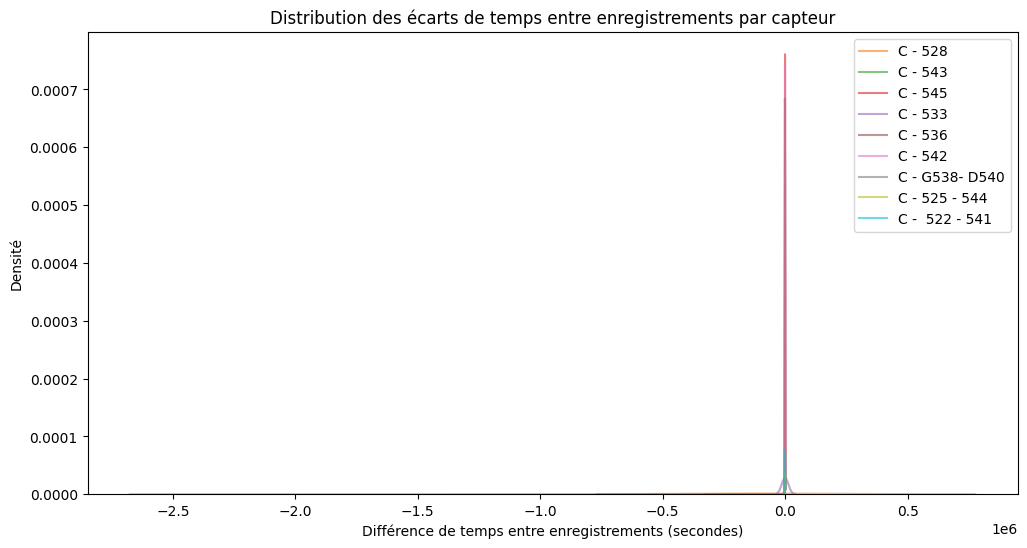

C:\Users\hp\AppData\Local\Temp\ipykernel_47016\3303258149.py:40: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  time_index = pd.date_range(start=min_time, end=max_time, freq=f"{int(global_interval)}S")


ValueError: columns overlap but no suffix specified: Index(['values'], dtype='object')

In [25]:
# 🕒 Convertir toutes les colonnes en format datetime
for col in df.columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# 🔍 Vérifier si la conversion a réussi
print("🔎 Aperçu des données après conversion :")
print(df.head())

# 📉 Supprimer les lignes contenant uniquement des valeurs NaN
df.dropna(how='all', inplace=True)

# 📊 Analyse des intervalles de temps entre les enregistrements
time_diffs = {col: df[col].diff().dropna().dt.total_seconds() for col in df.columns}

# 🔹 Trouver la fréquence moyenne d'enregistrement pour chaque capteur
avg_intervals = {col: time_diffs[col].median() for col in time_diffs if not time_diffs[col].empty}

# 📊 Trouver l'intervalle temporel commun
min_time = df.min().min()
max_time = df.max().max()
common_interval = max_time - min_time

print(f"\n📈 **Analyse des fréquences d'enregistrement**")
print(f"🔹 Intervalle temporel commun : {common_interval}")
print(f"🔹 Fréquence médiane d’enregistrement par capteur (en secondes) :")
print(avg_intervals)

# 📈 1️⃣ Visualisation des différences de temps entre enregistrements
plt.figure(figsize=(12, 6))
for col, diffs in time_diffs.items():
    sns.kdeplot(diffs, label=col, alpha=0.6)
plt.xlabel("Différence de temps entre enregistrements (secondes)")
plt.ylabel("Densité")
plt.title("Distribution des écarts de temps entre enregistrements par capteur")
plt.legend()
plt.show()

# 📉 Définir un temps de référence basé sur la fréquence médiane d'enregistrement
global_interval = np.median(list(avg_intervals.values()))  # Choisir une fréquence globale
time_index = pd.date_range(start=min_time, end=max_time, freq=f"{int(global_interval)}S")

# 📌 Rééchantillonnage des données pour aligner les capteurs sur un temps unique
df_resampled = pd.DataFrame(index=time_index)

for col in df.columns:
    temp_series = df[[col]].dropna().set_index(col)  # Utiliser la colonne comme index
    temp_series["values"] = 1  # Marquer les enregistrements
    df_resampled = df_resampled.join(temp_series["values"], how="outer")

# 📌 Interpolation des données pour combler les manques et synchroniser les capteurs
df_resampled.interpolate(method="linear", inplace=True)

# 📈 2️⃣ Visualisation de l’évolution temporelle des capteurs avant/après interpolation
plt.figure(figsize=(12, 6))
for col in df.columns:
    plt.plot(df[col], np.ones(len(df[col])) * df.columns.get_loc(col), 'o', label=col, alpha=0.6)
plt.xlabel("Temps")
plt.ylabel("Capteurs")
plt.title("Distribution des enregistrements des capteurs avant rééchantillonnage")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(df_resampled.T, cmap="coolwarm", cbar=True)
plt.title("Carte des enregistrements synchronisés après interpolation")
plt.xlabel("Temps rééchantillonné")
plt.ylabel("Capteurs")
plt.show()

# 📊 Vérification des données après interpolation
print("\n📌 Aperçu des données après rééchantillonnage et interpolation :")
print(df_resampled.head())

# 📈 3️⃣ Visualisation finale des séries temporelles alignées
plt.figure(figsize=(12, 6))
for col in df.columns:
    plt.plot(df_resampled.index, df_resampled[col], label=col, alpha=0.6)
plt.xlabel("Temps rééchantillonné")
plt.ylabel("Données interpolées")
plt.title("Séries temporelles alignées après interpolation")
plt.legend()
plt.show()
